In [5]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src/')
from mythicwind.gps import *
from mythicwind.csv_io import *

from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('notebook')

from glob import glob
from os import path
from multiprocessing import Pool

import vg

%matplotlib notebook

plt.style.use('notebook')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
sbittip_gps_path = '../data/turbines/turbine-13/sbittip/tom/gps/turbine-13_sbittip_tom_gps.csv'
sbitroot_gps_path = '../data/turbines/turbine-13/sbitroot/tom/gps/turbine-13_sbitroot_tom_gps.csv'
helihoist_gps_path = '../data/turbines/turbine-13/helihoist-1/tom/gps/turbine-13_helihoist-1_tom_gps.csv'

sbittip_gps_t12 = '../data/turbines/turbine-12/sbittip/tom/gps/turbine-12_sbittip_tom_gps.csv'
sbitroot_gps_t12 = '../data/turbines/turbine-12/sbitroot/tom/gps/turbine-12_sbitroot_tom_gps.csv'


In [15]:
sbittip_gps = read_frame(sbittip_gps_path)
sbitroot_gps = read_frame(sbitroot_gps_path)
helihoist_gps = read_frame(helihoist_gps_path)

sr_t12 = read_frame(sbitroot_gps_t12)
st_t12 = read_frame(sbittip_gps_t12)

In [8]:
helihoist_gps

,latitude,longitude,altitude
epoch,,,
2019-11-09 07:14:29.947999954+00:00,0.08117,0.00544,0.0
2019-11-09 07:14:30.051000118+00:00,0.08117,0.00544,25.5
2019-11-09 07:14:30.950999975+00:00,0.08115,0.00544,25.5
2019-11-09 07:14:31.051000118+00:00,0.08115,0.00544,26.3
2019-11-09 07:14:31.950999975+00:00,0.08114,0.00546,26.3
...,...,...,...
2019-11-17 21:21:23.977999926+00:00,0.08128,0.00464,109.1
2019-11-17 21:21:24.108999968+00:00,0.08128,0.00464,108.9
2019-11-17 21:21:25.115000010+00:00,0.08128,0.00464,109.1


<IPython.core.display.Javascript object>


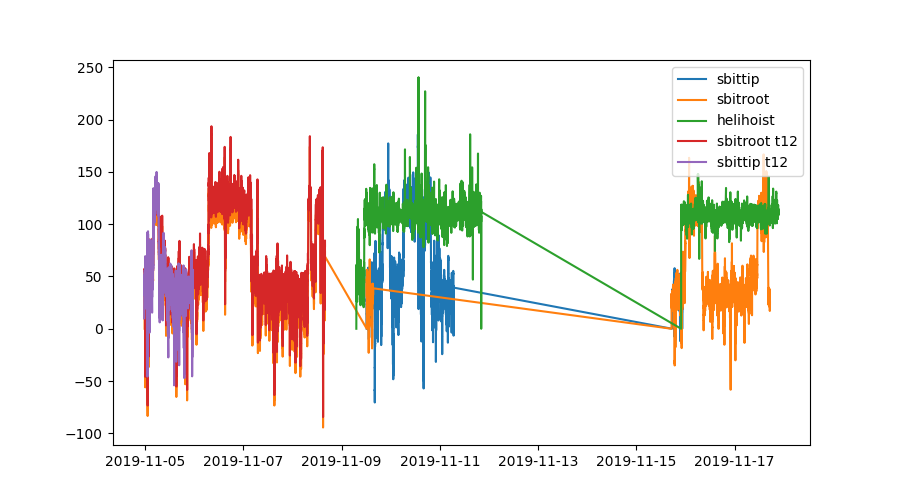

In [18]:
plt.figure()
plt.plot(sbittip_gps.altitude, label='sbittip')
plt.plot(sbitroot_gps.altitude, label='sbitroot')
plt.plot(helihoist_gps.altitude, label='helihoist')
plt.plot(sr_t12.altitude+10, label='sbitroot t12')
plt.plot(st_t12.altitude+10, label='sbittip t12')
plt.legend()

In [10]:
pd.to_timedelta?

2019-09-07 07:40:00+00:00 2019-09-07 12:10:00+00:00
nacelle orientation due north: 47


<IPython.core.display.Javascript object>


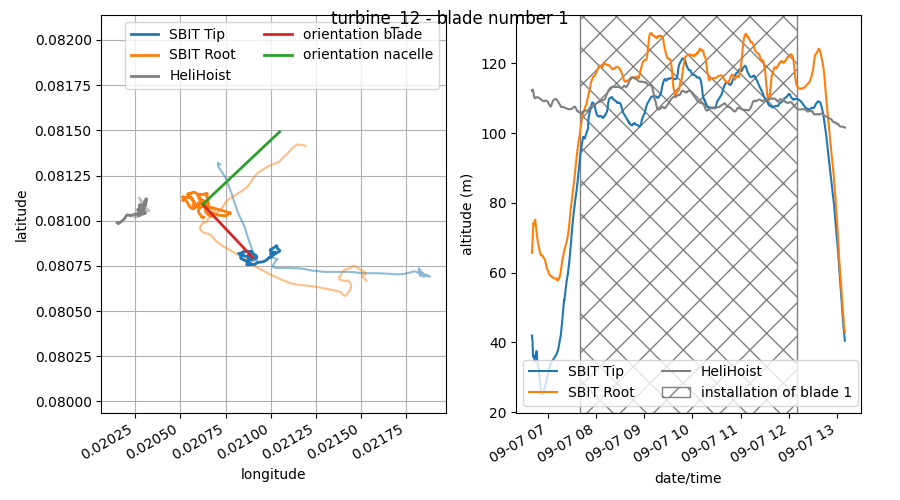

In [11]:
# sbi_start = pd.to_datetime('2019-11-05 04:45 +00:00')
# sbi_stop  = pd.to_datetime('2019-11-05 06:30 +00:00')

hh, sr, st, ii = estimate_sbi(helihoist_gps, 
                              sbitroot_gps, 
                              sbittip_gps, 
                              smoothing_window='10min', 
                              sbi_altitude_threshold=105
                             )

sbi_start = ii[0]
sbi_stop = ii[-1]

print(sbi_start, sbi_stop)

sbitroot_v, sbit_v, nacelle_v, nacelle_angle = estimate_nacelle_orientation(sbitroot_gps=sr,
                                                                            sbittip_gps=st,
                                                                            sbi_start=sbi_start,
                                                                            sbi_stop=sbi_stop,
                                                                           )

plot_sbi(sbitroot_gps=sbitroot_gps,
         sbittip_gps=sbittip_gps,
         helihoist_gps=helihoist_gps,
         sbitroot_v=sbitroot_v,
         sbit_v=sbit_v,
         nacelle_v=nacelle_v,
         start=start,
         stop=stop,
         sbi_start=sbi_start,
         sbi_stop=sbi_stop,
         turbine_name='turbine_12',
         blade_number=1
        )
